# Data Mining for Networks

##### Date: 13.01.2022  

##### Authors: Lynda Attouche, Lenny Klump

## Assignment 1
### Exercise 2

### 1. Installing scikit learn:

In [1]:
!pip install sklearn

In [2]:
# Making imports: 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()
import sklearn
import random
from sklearn.utils import shuffle
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import log_loss



###### Creating a Dataset:

In [3]:
def Data(N,theta):
    """
    Creates  randomly data points for linear regression
    
    @params
        -N (int): number of data points
        -theta (list/array): coefficients 
        
    @return: 
        - X,y (tuple of arrays): data points
    
    """
    X = np.random.random(N)*10
    #  y= ax+ b + noise (noramlly distributed)
    y = theta[0] + theta[1]*X + np.random.normal(0,0.5, N)
    return X, y

In [4]:
# Creating 100 datapoints:

N=100
theta=[1,0.5]
X, y = Data(N,theta)

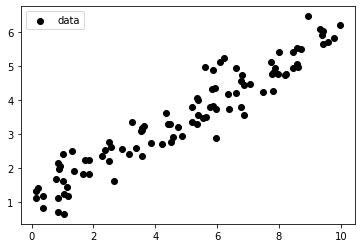

In [5]:
# Plotting the 100 datapoints:

plt.figure()
plt.scatter(X,y, label="data", marker='o',color='k')
plt.legend()

In [6]:
# Defining the Hyperparameters:

alpha=0.01  
MaxEpochs = 20
batch_size = 32

### 2. Writing a Linear Regression Function: 

In [7]:
def model(theta, X):
    """
    Defines the model
    @params:
            - theta (list/array): coefficients of the model
            - X (array): data
    @return 
           Array: model applied to data
    """
    # the model is linear, thus we can use the function y = theta0+theta1*x
    return theta[0]+theta[1]*X

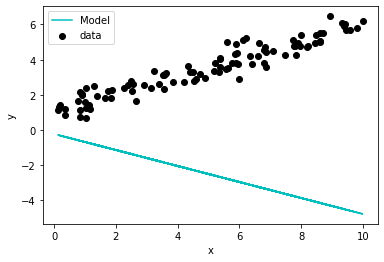

In [8]:
# Plotting the initial (random) line created by the model: 

thetaInitial = np.random.random(2)-0.5 
plt.scatter(X,y, label="data", marker='o',color='k')
plt.plot(X, model(thetaInitial,X), label="Model",color='c')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

In [9]:
# Defining the "Update functions":

# 1. simultaneous updates

def updateSim(model, alpha, theta, X, y):
    """
    Updates model parameters simultaneously
    @params:
            -model (func): define the model used for prediction
            -alpha (float): learning rate
            -theta (list/array): coefficients of the model 
            -X,y (arrays): data points
    @return: 
            updated theta 
    """
    temp = model(theta, X) - y
    theta[0] -= alpha*np.mean(temp)
    theta[1] -= alpha*np.mean(temp*X)
    return theta    

# 2. non simultaneous updates

def updateNonSim(model, alpha, theta, X, y):
    """
    Updates model parameters not simultaneously
    @params:
            -model (func): define the model used for prediction
            -alpha (float): learning rate
            -theta (list/array): coefficients of the model 
            -X,y (arrays): data points
    @return: 
            updated theta 
    """
    temp1 = model(theta, X) - y
    theta[0] -= alpha*np.mean(temp1)
    temp2 = model(theta, X) - y
    theta[1] -= alpha*np.mean(temp2*X)
    return theta    

In [10]:
def GradientDescent(model, alpha, MaxEpochs, theta, X, y,sim):
    """
    Defines a Gradient Descent function
    @params:
            -model (func): define the model used for prediction
            -alpha (float): learning rate
            -MaxEpochs (int): number of epochs for the gradient descent 
            -theta (list/array): coefficients of the model 
            -X,y (arrays): data points
            -sim (bool): indicates the type of update: simultaneous or not simultaneous
    @return: 
            - theta (list/array): coefficients that that minimizes a cost/loss function 
            - loss (array): the loss (J)
            - history (array): intermediate values of theta
    
    """
    loss = np.zeros(MaxEpochs) #contains the loss 
    history = np.zeros((MaxEpochs,2)) #contains theta values in each epoch
    #for each epoch
    for epoch in range(MaxEpochs):
        #updating
        if sim:
            theta= updateSim(model, alpha, theta, X, y)
        else:
            theta= updateNonSim(model, alpha, theta, X, y)
        #add to history
        history[epoch] = theta
        #Computing the loss
        loss[epoch] = np.mean((model(theta, X)-y)**2)
    return theta,loss,history

In [11]:
theta = thetaInitial.copy()
theta1,loss1,hist1 = GradientDescent(model, alpha, MaxEpochs, theta, X, y,sim=True)
print("The theta found with simultanoues updates is:",theta1)

The theta found with simultanoues updates is: [0.00453667 0.65855777]


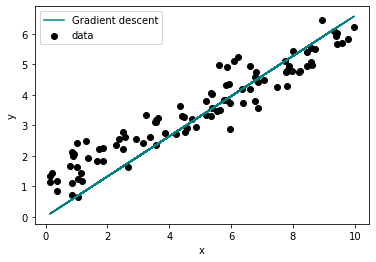

In [12]:
# Plotting the Linear Regression line: 
plt.scatter(X,y, label="data", marker='o',color='k')
plt.plot(X, model(theta1,X), color='teal', label="Gradient descent")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

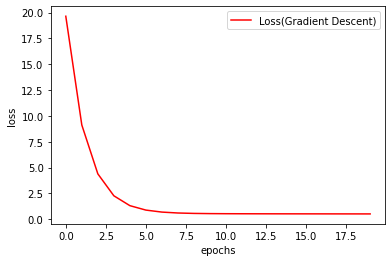

In [13]:
# Plotting the loss function of the gradient descent 
epochs = np.arange(MaxEpochs)
plt.plot(epochs, loss1,'r', label='Loss(Gradient Descent)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### 3. Using mini-batch gradient descent

#### NB: 
Due to a misunderstanding of the exercise at the beginning, we implemented mini-batch and stochastic gradient descent by ourservles.
We decided to leave the code in addition to using scikit though. 

In [14]:
def MiniBatchGradientDescent(model, alpha, MaxEpochs, theta, X,y, batch_size,sim):
    """
    Defines Mini Batch Gradient Descent function
    @params:
            -model (func): define the model used for prediction
            -alpha (float): learning rate
            -MaxEpochs (int): number of epochs for the gradient descent 
            -theta (list/array): coefficients of the model 
            -X,y (arrays): data points
            -batch_size (int): size of a batch
            -sim (bool): indicates the type of update: simultaneous or not simultaneous
    @return: 
            - theta (list/array): coefficients that that minimizes a cost/loss function 
            - loss (array): the loss (J)
            - history (array): intermediate values of theta
    
    """
    history = np.zeros((MaxEpochs,2)) #contains theta values in each epoch
    #Calculating the number of batches:
    numb_batches = int(len(X)/batch_size)
    loss = np.zeros(MaxEpochs)
    #for each epoch
    for epoch in range(MaxEpochs):
        #shuffling the data
        X,y = shuffle(X,y)
        #for each batch
        lo = 0 #batch loss
        for b in range(0,batch_size):
            #picking a batch/sample 
            Xb,yb = X[b:b+batch_size],y[b:b+batch_size]
            #updating params
            if sim:
                theta= updateSim(model, alpha, theta, Xb, yb)
            else:
                theta= updateNonSim(model, alpha, theta, Xb, yb)
            
            #calculating the batch loss
            lo+=  np.mean( (model(theta, Xb)-yb)**2 )
        loss[epoch] = lo #epoch lossd
        history[epoch] = theta
        
    return theta,loss,history

In [15]:
theta = thetaInitial.copy()
theta2,loss2,hist2 =  MiniBatchGradientDescent(model, alpha, MaxEpochs, theta, X,y, batch_size,sim=True)
print("The theta found with simultaneous updates is:",theta2)

The theta found with simultaneous updates is: [0.88572595 0.52152011]


In [16]:
# With Scikit:
reg_SGD = SGDRegressor(max_iter=20, tol=1e-2)
reg_SGD.partial_fit(X.reshape(-1, 1), y)
theta2_2 = [reg_SGD.intercept_,reg_SGD.coef_]
print("The optimal theta found with scikit is:",theta2_2)

The optimal theta found with scikit is: [array([0.1871113]), array([0.6132599])]


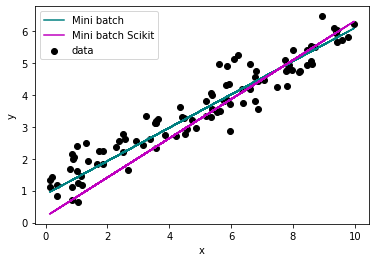

In [17]:
# Comparing the Linear Regression line of our defined function and the scikit function: 

plt.scatter(X,y, label="data", marker='o',color='k')
plt.plot(X, model(theta2,X), color='teal', label="Mini batch ")
plt.plot(X, model(theta2_2,X), color='m', label="Mini batch Scikit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

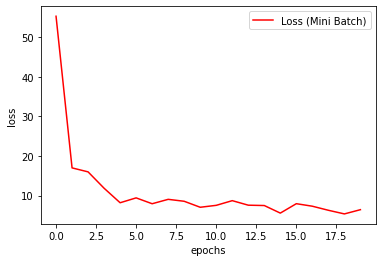

In [18]:
# Plotting the Loss function of our defined function:

plt.plot(epochs, loss2,'r', label='Loss (Mini Batch)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

##### Using stochastic gradient descent

In [19]:
def StochasticGradientDescent(model, alpha, MaxEpochs, theta, X,y,sim):
    """
    Defines Stochastic Gradient Descent function
    @params:
            -model (func): define the model used for prediction
            -alpha (float): learning rate
            -MaxEpochs (int): number of epochs for the gradient descent 
            -theta (list/array): coefficients of the model 
            -X,y (arrays): data points
            -sim (bool): indicates the type of update: simultaneous or not simultaneous
    @return: 
            - theta (list/array): coefficients that that minimizes a cost/loss function 
            - loss (array): the loss (J)
            - history (array): intermediate values of theta
    
    """
    loss = np.zeros(MaxEpochs)
    history = np.zeros((MaxEpochs,2)) #contains theta values in each epoch
    #for each epoch
    for epoch in range(MaxEpochs):
        #for each instance/single point/ 1datapoint
        idx = np.random.randint(0,len(X))
        # we take a random single point of index "idx"
        Xi,yi = X[idx],y[idx]
        if sim:
            theta= updateSim(model, alpha, theta, Xi, yi)
        else:
            theta= updateNonSim(model, alpha, theta, Xi, yi)
        loss[epoch] = np.mean( (model(theta, Xi)-yi)**2 )
        history[epoch] = theta
    return theta,loss,history

In [20]:
theta = thetaInitial.copy()
theta3,loss3,hist3 =   StochasticGradientDescent(model, alpha, MaxEpochs, theta, X,y,sim=True)
print("The theta found with simultaneous updates is:",theta3)

The theta found with simultaneous updates is: [0.0121037  0.59889848]


In [21]:
# With Scikit:

reg_SGD = SGDRegressor(max_iter=20, tol=1e-2)
reg_SGD.get_params()
reg_SGD.fit(X.reshape(-1, 1), y)
theta3_2 = [reg_SGD.intercept_,reg_SGD.coef_]
print("The theta found with scikit is:",theta3_2)

The theta found with scikit is: [array([0.48984855]), array([0.57319309])]


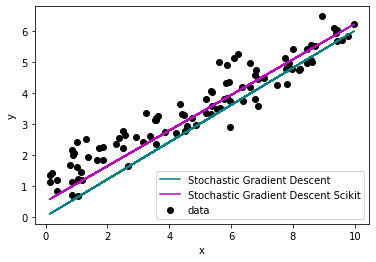

In [22]:
# Comparing the Linear Regression Line of Scikit SGD and the one we defined:

plt.scatter(X,y, label="data", marker='o',color='k')
plt.plot(X, model(theta3,X), color='teal', label="Stochastic Gradient Descent")
plt.plot(X, model(theta3_2,X), color='m', label="Stochastic Gradient Descent Scikit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

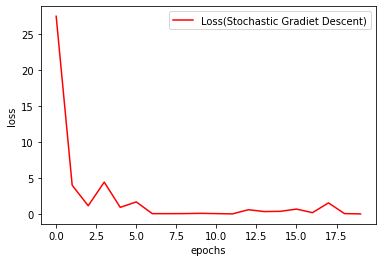

In [23]:
# Plotting the Loss fucntion of our function: 

plt.plot(epochs, loss3,'r', label='Loss(Stochastic Gradiet Descent)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

###### Comparing gradient gescent, mini-batch gradient Descent and stochastic gradient descent

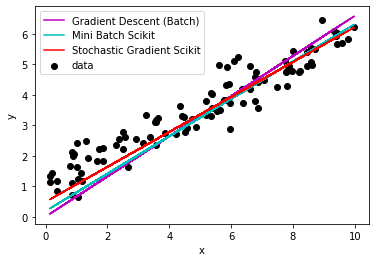

In [24]:
# Plotting the three results and the data:

plt.scatter(X,y, label="data", marker='o',color='k')
plt.plot(X, model(theta1,X), color='m' , label="Gradient Descent (Batch)")
plt.plot(X, model(theta2_2,X), color='c' ,  label="Mini Batch Scikit")
plt.plot(X, model(theta3_2,X), color='r' ,  label="Stochastic Gradient Scikit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

###### We can observe that Gradient Descent and Stachastic Gradient Descent lie really close together. Mini-batch gradient descent is alo not far off. However, the mini-batch gradient decent seems to be a bit off the minimum and not quite converge. That can be seen when observing the loss functions in comparison: 

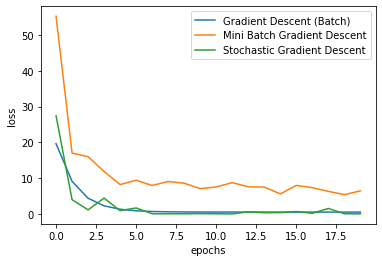

In [25]:
# Plotting the three Loss functions:

plt.plot(epochs, loss1, label="Gradient Descent (Batch)")
plt.plot(epochs, loss2, label="Mini Batch Gradient Descent")
plt.plot(epochs, loss3, label="Stochastic Gradient Descent")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### 4. Comparing the different solutions

Simultaneous/non-simultaneous updates for Gradient Descent 

Simultaneous:
Theta [0.00453667 0.65855777]

Non-simultaneous
Theta [0.00610092 0.65787933]

Comparing models and losses


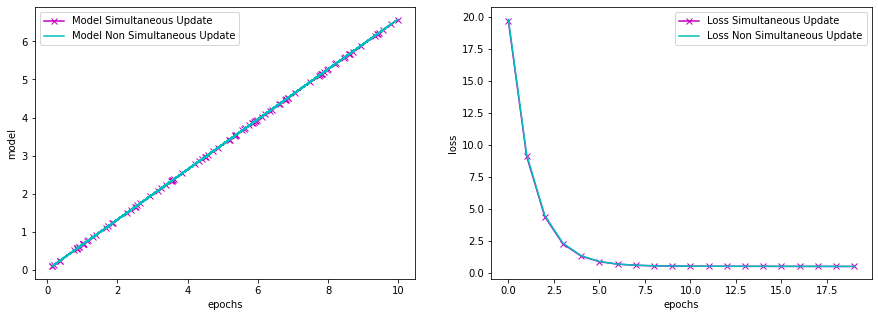

In [26]:
# Comparison of Simultaneous / non Simultaneoud Updates for Gradient Descent:

theta = thetaInitial.copy()
theta1_NonSim,loss1_NonSim,hisS = GradientDescent(model, alpha, MaxEpochs, theta, X, y,sim=False)
theta = thetaInitial.copy()
theta1_Sim,loss1_Sim,hisNS = GradientDescent(model, alpha, MaxEpochs, theta, X, y,sim=True)

print("Simultaneous/non-simultaneous updates for Gradient Descent \n")
print("Simultaneous:")
print("Theta",theta1_Sim)
print("\nNon-simultaneous")
print("Theta",theta1_NonSim)

fig, ax = plt.subplots(1,2, figsize=(15,5))


print('\nComparing models and losses')
ax[0].plot(X, model(theta1_NonSim,X), color='m' , marker='x',label="Model Simultaneous Update")
ax[0].plot(X, model(theta1_Sim,X), color='c' ,  label="Model Non Simultaneous Update")


ax[1].plot(epochs, loss1_Sim,'m', marker='x',label='Loss Simultaneous Update')
ax[1].plot(epochs, loss1_NonSim,'c', label='Loss Non Simultaneous Update')

ax[0].set_xlabel('epochs')
ax[0].set_ylabel('model')
ax[0].legend()

ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

###### We can observe, that there is a slight difference in the simulatneous and non-simultaneous updates, even after 20 epochs.

###### It turns out that the sequential update works in our case. But it might not work with other problems.

Simultaneous/non-simultaneous updates for Mini Batch Gradient Descent 

Simultaneous:
Theta [0.8736658  0.51772016]

Non-simultaneous
Theta [0.86303723 0.51415547]


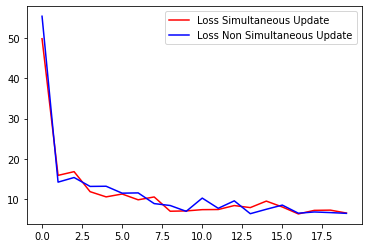

In [27]:
# Comparison of Simultaneous / non Simultaneoud Updates for Mini Batch Gradient Descent:

theta = thetaInitial.copy()
theta2_Sim,loss2_Sim,his2_Sim =  MiniBatchGradientDescent(model, alpha, MaxEpochs, theta, X,y, batch_size,sim=True)
theta = thetaInitial.copy()
theta2_NonSim,loss2_NonSim, his2_NSim=  MiniBatchGradientDescent(model, alpha, MaxEpochs, theta, X,y, batch_size,sim=False)
print("Simultaneous/non-simultaneous updates for Mini Batch Gradient Descent \n")
print("Simultaneous:")
print("Theta",theta2_Sim)
print("\nNon-simultaneous")
print("Theta",theta2_NonSim)

plt.plot(epochs, loss2_Sim,'r', label='Loss Simultaneous Update')
plt.plot(epochs, loss2_NonSim,'b', label='Loss Non Simultaneous Update')
plt.legend()

Simultaneous/non-simultaneous updates for Stochastic Gradient Descent

Simultaneous:
Theta [-0.01696435  0.69530461]

Non-simultaneous
Theta [0.03393855 0.68251571]


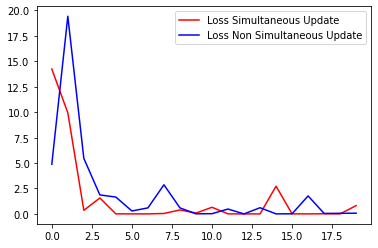

In [28]:
# Comparison of Simultaneous / non Simultaneoud Updates for Stochastic Gradient Descent:

theta = thetaInitial.copy()
theta3_Sim,loss3_Sim, his3_Sim=   StochasticGradientDescent(model, alpha, MaxEpochs, theta, X,y,sim=True)
theta = thetaInitial.copy()
theta3_NonSim,loss3_NonSim,his3_NSIm=   StochasticGradientDescent(model, alpha, MaxEpochs, theta, X,y,sim=False)
print("Simultaneous/non-simultaneous updates for Stochastic Gradient Descent\n")
print("Simultaneous:")
print("Theta",theta3_Sim)
print("\nNon-simultaneous")
print("Theta",theta3_NonSim)

plt.plot(epochs, loss3_Sim,'r', label='Loss Simultaneous Update')
plt.plot(epochs, loss3_NonSim,'b', label='Loss Non Simultaneous Update')
plt.legend()

### 5. Compare the different solutions

We compare the evolution of theta values with respect to the number of epochs for the three models studied.

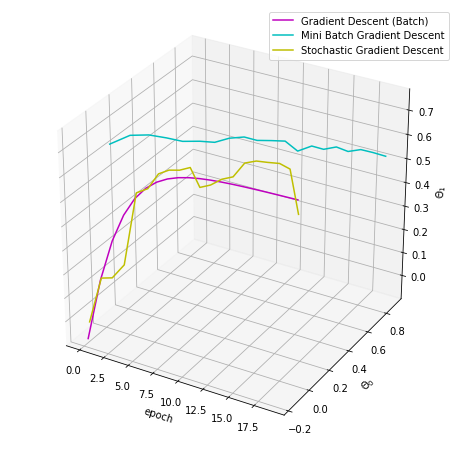

In [29]:
# Plotting the intermediate values of theta for the three models:

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(epochs, hist1[:,0], hist1[:,1], 'm',label="Gradient Descent (Batch)")
ax.plot3D(epochs, hist2[:,0], hist2[:,1], 'c',label="Mini Batch Gradient Descent")
ax.plot3D(epochs, hist3[:,0], hist3[:,1], 'y',label="Stochastic Gradient Descent")
ax.set_ylabel('${\Theta}_0$')
ax.set_zlabel('${\Theta}_1$')
ax.set_xlabel('epoch')
ax.legend()


###### We observe that in the case of (Batch) Gradient Descent; the algorithm follows a straight line to the minimum. 

###### On the other hand, the stochastic algorithms wander over more points and then finally converge to the minimum. 

###### Similarly, the Mini-batch suffers from variations (oscillation) and appears to not converge. 